In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs

creating custom dataset

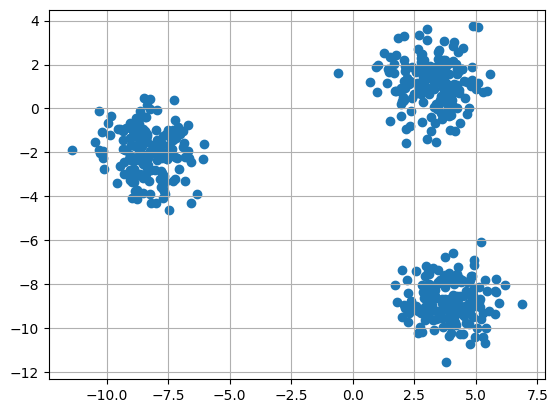

In [9]:
X,y=make_blobs(n_samples=500,n_features=2,centers=3,random_state=500)
fig=plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [5]:
k = 3
clusters = {}
np.random.seed(23)
for idx in range(k):
    center = 2 * (2 * np.random.random((X.shape[1],)) - 1)  # random center in [-2, 2]
    cluster = {
        'center': center,
        'points': []
    }
    clusters[idx] = cluster
clusters

{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}

plotting random intialized  center with data points

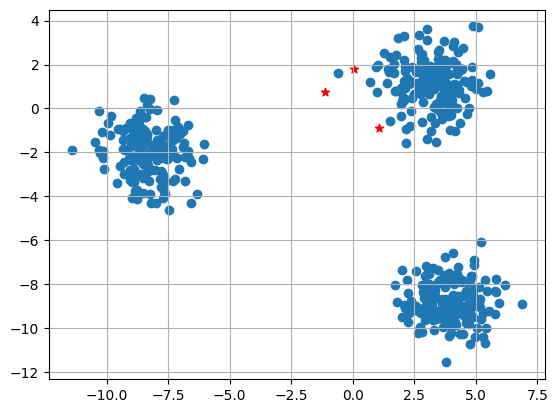

In [10]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center=clusters[i]['center']
    plt.scatter(center[0],center[1],marker='*',c='red')
plt.show()

define eucledian distance 

In [11]:
def distance(p1,p2):
    return np.sqrt(np.sum(p1-p2)**2)

In [13]:
def assign_clusters(X,clusters):
    for idx in range (X.shape[0]):
        dist=[]
        curr_x=X[idx]
        for i in range(k):
            dis=distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster=np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters 

def update_clusters(X,clusters):
    for i in range(k):
        points=np.array(clusters[i]['points'])
        if points.shape[0]> 0 :
            new_center=points.mean(axis=0)
            clusters[i]['center']=new_center
            clusters[i]['points']=[]
    return clusters 
